Четыре черепахи находятся в углах квадрата со стороной а. Черепахи начинают двигаться одновременно с одинаковой и постоянной по модулю скоростью v, При этом первая черепаха все время держит курс на вторую, вторая — на третью, третья — на четвертую, четвертая — на первую. Через какое время t черепахи встретятся? 

Правила игры:
Только `numpy, matplotlib`. Никаких `append-ов`.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams['figure.dpi'] = 150

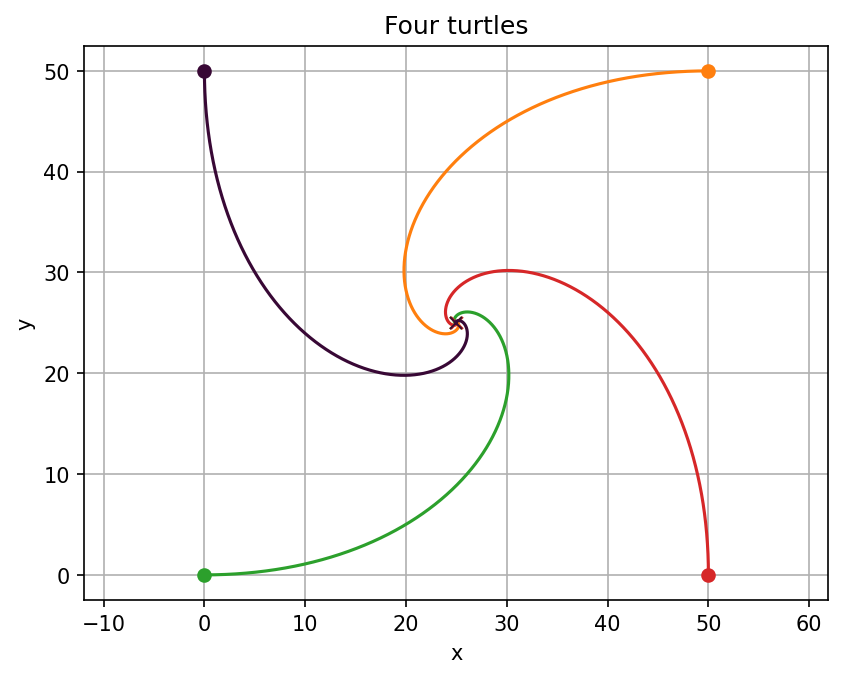

In [ ]:
a = 50.0 # длина квадрата
v = 1.0 # скорость
t = 0.01 # шаг по времени

turtles = np.array([[0.0, 0.0], [a, 0.0], [a, a], [0.0, a]]) # начальные точки каждой из черепашек

steps = int(a / v / t) 
traj = np.zeros((steps, 4, 2))
# steps - количество наших шагов, 4 - количество чеперашек, 2 - количество координат
traj[0] = turtles.copy() # сохраняем начальное положение 

# Моделирование
for step in range(1, steps):
    new_turtles = turtles.copy()
    
    for i in range(4):
        target = turtles[(i + 1) % 4] # определяем цель для черепашки; чтобы скакать от 0 до 3, пишем так. А еще знак в (i+1) задает направление
        dx, dy = target - turtles[i] # считаем вектор направления черепашек через разность координат
        
        dist = np.sqrt(dx*dx + dy*dy) # П И Ф А Г О Р
        
        # здесь мы хотим избежать деления на нуль, вдруг черепашки уже встретились и едят пиццу
        if dist > 0: 
            new_turtles[i] += np.array([dx/dist * v * t, dy/dist * v * t]) # dx и dy надо нормировать, это не постоянная величина, иначе скорость будет непостоянной

    turtles = new_turtles
    traj[step] = turtles

# Визуализация
fig, ax = plt.subplots(1, 1)
ax.set_title(f"Four turtles")
ax.axis("equal")
ax.set_xlabel("x", fontsize=10)
ax.set_ylabel("y", fontsize=10)
ax.grid(True)

colors = ["tab:green", "tab:red", "tab:orange", "xkcd:eggplant"]


for i in range(4):
    ax.plot(traj[:, i, 0], traj[:, i, 1], color=colors[i]) # по x: все траектории, i-я черепашка, x-ая коорд, а по y соответственно y
    ax.plot(traj[0, i, 0], traj[0, i, 1], 'o', color=colors[i]) # нач точка
    ax.plot(traj[-1, i, 0], traj[-1, i, 1], 'x', color=colors[i]) # кон точка

plt.show()

In [ ]:
# Создаем объекты для анимации
turtle_dots = []
turtle_trails = []
trail_length = 100  # длина хвоста траектории

# Инициализация точек и траекторий
for i in range(4):
    # Точки (черепашки)
    dot, = ax.plot([], [], 'o', color=colors[i], markersize=8)
    turtle_dots.append(dot)
    
    # Траектории (только последние trail_length точек)
    trail, = ax.plot([], [], '-', color=colors[i], alpha=0.7, linewidth=2)
    turtle_trails.append(trail)

# Начальные и конечные точки
for i in range(4):
    ax.plot(traj[0, i, 0], traj[0, i, 1], 'o', color=colors[i], markersize=10, label=f'Turtle {i+1} Start')
    ax.plot(traj[-1, i, 0], traj[-1, i, 1], 'x', color=colors[i], markersize=10, label=f'Turtle {i+1} End')

# Добавляем легенду
ax.legend(loc='upper right')

# Функция инициализации
def init():
    for dot in turtle_dots:
        dot.set_data([], [])
    for trail in turtle_trails:
        trail.set_data([], [])
    return turtle_dots + turtle_trails

# Функция обновления кадра
def update(frame):
    # Обновляем позиции точек
    for i in range(4):
        turtle_dots[i].set_data([traj[frame, i, 0]], [traj[frame, i, 1]])
    
    # Обновляем траектории (показываем только последние trail_length шагов)
    for i in range(4):
        start_idx = max(0, frame - trail_length)
        turtle_trails[i].set_data(
            traj[start_idx:frame+1, i, 0], 
            traj[start_idx:frame+1, i, 1]
        )
    
    # Обновляем заголовок с информацией о текущем времени
    ax.set_title(f"Four turtles - Time: {frame*dt:.2f}s")
    
    return turtle_dots + turtle_trails

# Создаем анимацию
# Используем каждый 10-й кадр для ускорения анимации
ani = FuncAnimation(
    fig, 
    update, 
    frames=range(0, steps, 10),  # каждый 10-й кадр для ускорения
    init_func=init, 
    blit=True,
    interval=20,  # интервал между кадрами в миллисекундах
    repeat=True
)

plt.tight_layout()

# Сохраняем анимацию ДО показа
try:
    ani.save('turtles_animation.gif', writer='pillow', fps=30, dpi=80)
    print("Анимация сохранена как 'turtles_animation.gif'")
except Exception as e:
    print(f"Ошибка при сохранении: {e}")

plt.show()

Анимация сохранена как 'turtles_animation.gif'


<Figure size 640x480 with 0 Axes>